In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/"

doordash = pd.read_csv(file_path + "DoorDash.csv")

Mounted at /content/drive


In [3]:
doordash.head()

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status
0,12/14/2023,Fairlawn,Thursday,1.42,1.0,1.0,5.0,$20.00,1.0,$14.08,Na
1,12/15/2023,N Canton,Friday,2.00,1.0,1.0,6.0,$33.25,1.0,$16.63,Na
2,12/16/2023,Hudson,Saturday,2.00,1.0,1.0,6.0,$35.00,1.0,$17.50,Na
3,12/17/2023,Green,Sunday,1.75,1.0,0.0,4.0,$25.25,0.0,$14.43,Na
4,12/18/2023,Kent,Monday,2.00,1.0,1.0,8.0,$34.00,1.0,$17.00,Na


In [4]:
doordash

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status
0,12/14/2023,Fairlawn,Thursday,1.42,1.0,1.0,5.0,$20.00,1.0,$14.08,Na
1,12/15/2023,N Canton,Friday,2.00,1.0,1.0,6.0,$33.25,1.0,$16.63,Na
2,12/16/2023,Hudson,Saturday,2.00,1.0,1.0,6.0,$35.00,1.0,$17.50,Na
3,12/17/2023,Green,Sunday,1.75,1.0,0.0,4.0,$25.25,0.0,$14.43,Na
4,12/18/2023,Kent,Monday,2.00,1.0,1.0,8.0,$34.00,1.0,$17.00,Na
...,...,...,...,...,...,...,...,...,...,...,...
129,10/3/2024,Alliance,Thursday,2.00,0.0,1.0,6.0,$38.00,1.0,$19.00,Gold
130,10/17/2024,Kent,Thursday,3.00,1.0,1.0,10.0,$53.00,1.0,$17.67,Gold
131,10/18/2024,N Canton,Friday,1.83,1.0,1.0,4.0,$37.25,1.0,$20.36,Gold
132,10/20/2024,Fairlawn,Sunday,2.83,1.0,0.0,7.0,$58.25,1.0,$20.58,Gold


In [5]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        133 non-null    object 
 1   Location    133 non-null    object 
 2   Weekday     133 non-null    object 
 3   Hours       133 non-null    float64
 4   Night       133 non-null    float64
 5   Holiday     133 non-null    float64
 6   Deliveries  133 non-null    float64
 7   Amount      133 non-null    object 
 8   B Weather   133 non-null    float64
 9   $/HR        134 non-null    object 
 10  Status      133 non-null    object 
dtypes: float64(5), object(6)
memory usage: 11.6+ KB


In [6]:
doordash = doordash.drop([133])

In [7]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        133 non-null    object 
 1   Location    133 non-null    object 
 2   Weekday     133 non-null    object 
 3   Hours       133 non-null    float64
 4   Night       133 non-null    float64
 5   Holiday     133 non-null    float64
 6   Deliveries  133 non-null    float64
 7   Amount      133 non-null    object 
 8   B Weather   133 non-null    float64
 9   $/HR        133 non-null    object 
 10  Status      133 non-null    object 
dtypes: float64(5), object(6)
memory usage: 11.6+ KB


In [8]:
doordash.columns

Index(['Date', 'Location', 'Weekday', 'Hours', 'Night', 'Holiday',
       'Deliveries', 'Amount', 'B Weather', '$/HR', 'Status'],
      dtype='object')

In [9]:
doordash["Deliveries"].describe()

,Deliveries
count,133.000000
mean,7.812030
std,2.514053
min,2.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,17.000000


In [10]:
doordash["Hours"].describe()

,Hours
count,133.000000
mean,2.714361
std,0.695605
min,0.750000
25%,2.000000
50%,2.830000
75%,3.000000
max,5.000000


In [11]:
print(doordash["Location"].unique())

['Fairlawn' 'N Canton' 'Hudson' 'Green' 'Kent' 'Medina' 'C Falls'
 'Alliance' 'X' 'Barberton']


In [12]:
doordash

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status
0,12/14/2023,Fairlawn,Thursday,1.42,1.0,1.0,5.0,$20.00,1.0,$14.08,Na
1,12/15/2023,N Canton,Friday,2.00,1.0,1.0,6.0,$33.25,1.0,$16.63,Na
2,12/16/2023,Hudson,Saturday,2.00,1.0,1.0,6.0,$35.00,1.0,$17.50,Na
3,12/17/2023,Green,Sunday,1.75,1.0,0.0,4.0,$25.25,0.0,$14.43,Na
4,12/18/2023,Kent,Monday,2.00,1.0,1.0,8.0,$34.00,1.0,$17.00,Na
...,...,...,...,...,...,...,...,...,...,...,...
128,9/29/2024,Alliance,Sunday,3.75,0.0,0.0,9.0,$73.00,0.0,$19.47,Gold
129,10/3/2024,Alliance,Thursday,2.00,0.0,1.0,6.0,$38.00,1.0,$19.00,Gold
130,10/17/2024,Kent,Thursday,3.00,1.0,1.0,10.0,$53.00,1.0,$17.67,Gold
131,10/18/2024,N Canton,Friday,1.83,1.0,1.0,4.0,$37.25,1.0,$20.36,Gold


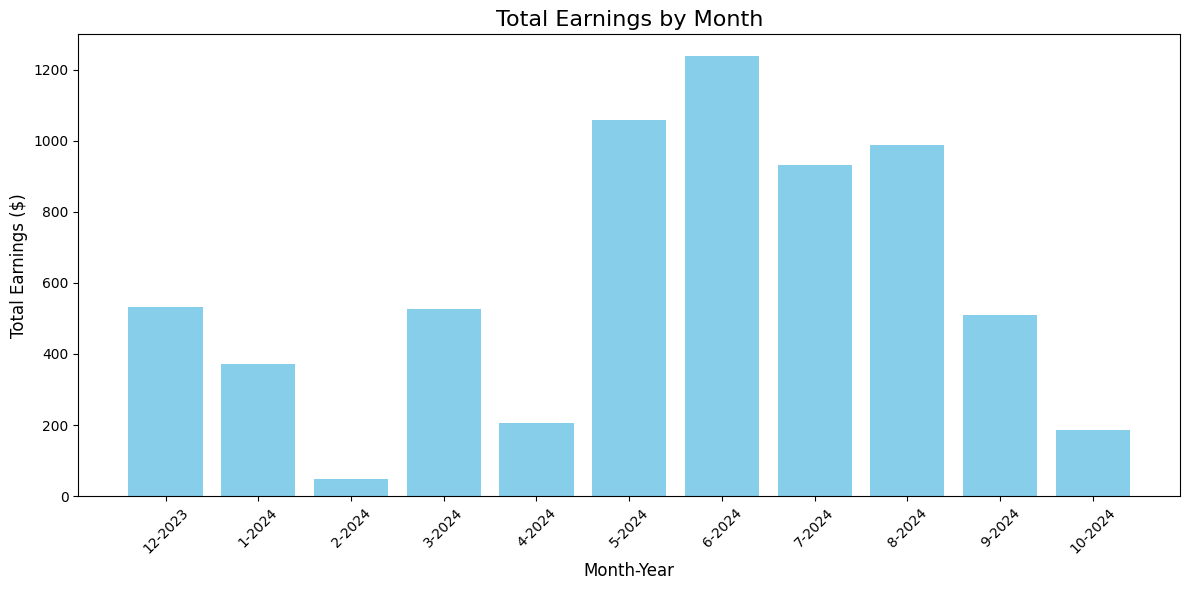

In [13]:
# creats a bar chart of my total earnings for each month

doordash['Date'] = pd.to_datetime(doordash["Date"])

doordash['Amount'] = doordash['Amount'].str.replace('$', '').astype(float)

doordash['Month'] = doordash['Date'].dt.month
doordash['Year'] = doordash['Date'].dt.year

monthly_earnings = doordash.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

monthly_earnings['Month-Year'] = monthly_earnings['Month'].astype(str) + '-' + monthly_earnings['Year'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(monthly_earnings['Month-Year'], monthly_earnings['Amount'], color='skyblue')
plt.title('Total Earnings by Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Earnings ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
monthly_earnings

,Year,Month,Amount,Month-Year
0,2023,12,531.21,12-2023
1,2024,1,370.94,1-2024
2,2024,2,48.36,2-2024
3,2024,3,525.69,3-2024
4,2024,4,205.34,4-2024
5,2024,5,1057.41,5-2024
6,2024,6,1237.48,6-2024
7,2024,7,932.01,7-2024
8,2024,8,988.65,8-2024
9,2024,9,509.77,9-2024


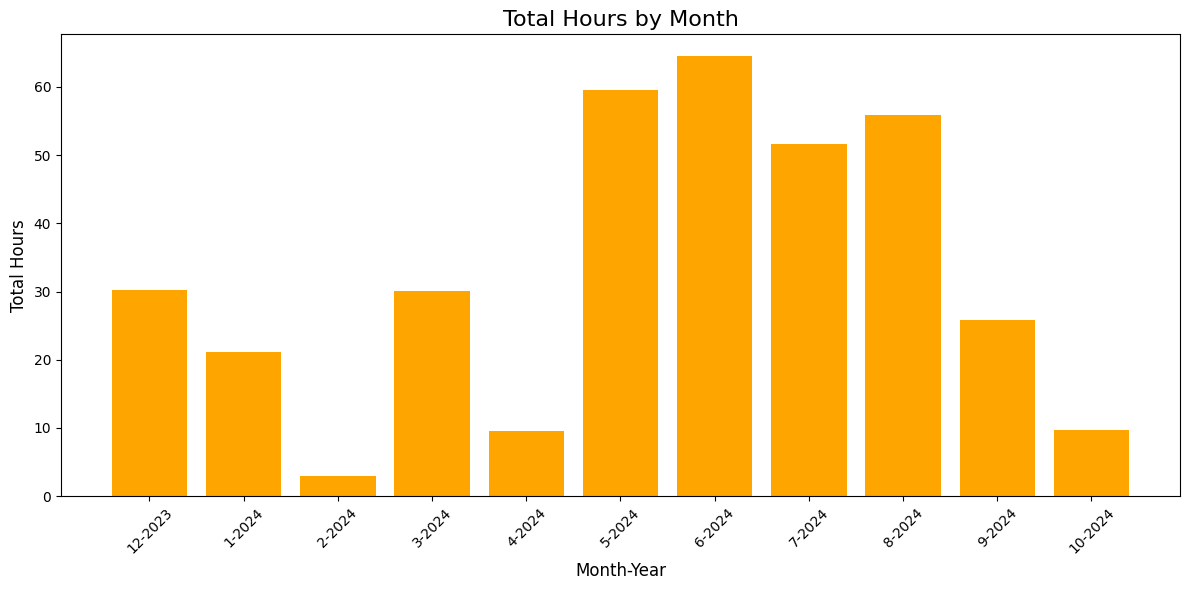

In [15]:
# creates a bar chart of my total hours for each month

doordash['Hours'] = doordash['Hours'].astype(float)

doordash['Month'] = doordash['Date'].dt.month
doordash['Year'] = doordash['Date'].dt.year

monthly_hours = doordash.groupby(['Year', 'Month'])['Hours'].sum().reset_index()

monthly_hours['Month-Year'] = monthly_hours['Month'].astype(str) + '-' + monthly_hours['Year'].astype(str)


plt.figure(figsize=(12, 6))
plt.bar(monthly_hours['Month-Year'], monthly_hours['Hours'], color='orange')
plt.title('Total Hours by Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Hours', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
monthly_hours

,Year,Month,Hours,Month-Year
0,2023,12,30.17,12-2023
1,2024,1,21.18,1-2024
2,2024,2,3.00,2-2024
3,2024,3,30.08,3-2024
4,2024,4,9.50,4-2024
5,2024,5,59.59,5-2024
6,2024,6,64.49,6-2024
7,2024,7,51.68,7-2024
8,2024,8,55.84,8-2024
9,2024,9,25.82,9-2024


In [17]:
doordash.columns

Index(['Date', 'Location', 'Weekday', 'Hours', 'Night', 'Holiday',
       'Deliveries', 'Amount', 'B Weather', '$/HR', 'Status', 'Month', 'Year'],
      dtype='object')

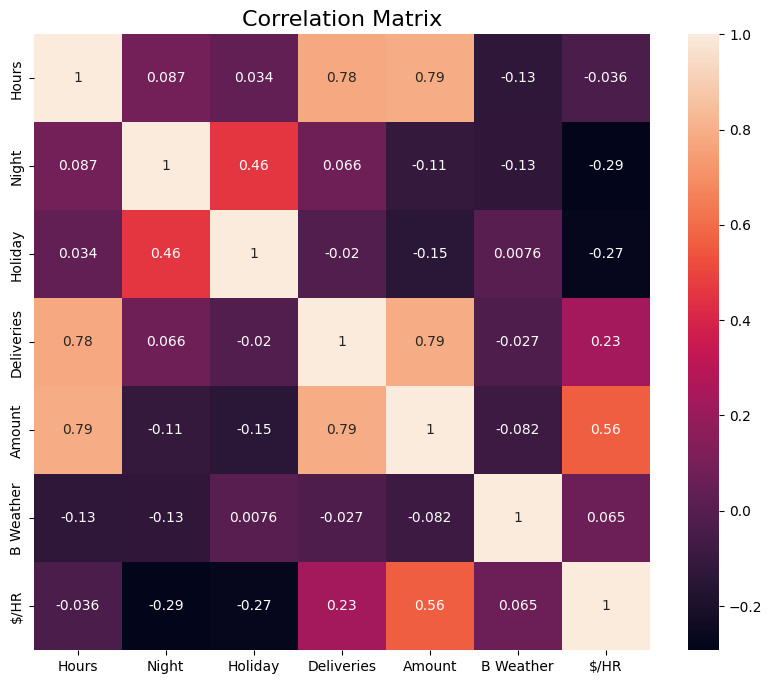

In [18]:
# creates a correlation matrix of all of my numerical data

import seaborn as sns

doordash['Deliveries'] = doordash['Deliveries'].astype(float)
doordash['$/HR'] = doordash['$/HR'].str.replace('$', '').astype(float)

numeric_columns = doordash.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = doordash[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [19]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        133 non-null    datetime64[ns]
 1   Location    133 non-null    object        
 2   Weekday     133 non-null    object        
 3   Hours       133 non-null    float64       
 4   Night       133 non-null    float64       
 5   Holiday     133 non-null    float64       
 6   Deliveries  133 non-null    float64       
 7   Amount      133 non-null    float64       
 8   B Weather   133 non-null    float64       
 9   $/HR        133 non-null    float64       
 10  Status      133 non-null    object        
 11  Month       133 non-null    int32         
 12  Year        133 non-null    int32         
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 12.6+ KB


In [20]:
doordash["Amount"].describe()

,Amount
count,133.000000
mean,49.574135
std,15.212668
min,11.000000
25%,38.500000
50%,49.250000
75%,58.250000
max,91.450000


In [21]:
doordash["$/HR"].describe()

,$/HR
count,133.000000
mean,18.297820
std,3.656022
min,11.000000
25%,15.920000
50%,18.020000
75%,20.310000
max,33.250000


In [22]:
doordash["$/HR"].max()

33.25

In [23]:
doordash["$/HR"].mean()

18.29781954887218

In [24]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        133 non-null    datetime64[ns]
 1   Location    133 non-null    object        
 2   Weekday     133 non-null    object        
 3   Hours       133 non-null    float64       
 4   Night       133 non-null    float64       
 5   Holiday     133 non-null    float64       
 6   Deliveries  133 non-null    float64       
 7   Amount      133 non-null    float64       
 8   B Weather   133 non-null    float64       
 9   $/HR        133 non-null    float64       
 10  Status      133 non-null    object        
 11  Month       133 non-null    int32         
 12  Year        133 non-null    int32         
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 12.6+ KB


In [25]:
doordash

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status,Month,Year
0,2023-12-14,Fairlawn,Thursday,1.42,1.0,1.0,5.0,20.00,1.0,14.08,Na,12,2023
1,2023-12-15,N Canton,Friday,2.00,1.0,1.0,6.0,33.25,1.0,16.63,Na,12,2023
2,2023-12-16,Hudson,Saturday,2.00,1.0,1.0,6.0,35.00,1.0,17.50,Na,12,2023
3,2023-12-17,Green,Sunday,1.75,1.0,0.0,4.0,25.25,0.0,14.43,Na,12,2023
4,2023-12-18,Kent,Monday,2.00,1.0,1.0,8.0,34.00,1.0,17.00,Na,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-29,Alliance,Sunday,3.75,0.0,0.0,9.0,73.00,0.0,19.47,Gold,9,2024
129,2024-10-03,Alliance,Thursday,2.00,0.0,1.0,6.0,38.00,1.0,19.00,Gold,10,2024
130,2024-10-17,Kent,Thursday,3.00,1.0,1.0,10.0,53.00,1.0,17.67,Gold,10,2024
131,2024-10-18,N Canton,Friday,1.83,1.0,1.0,4.0,37.25,1.0,20.36,Gold,10,2024


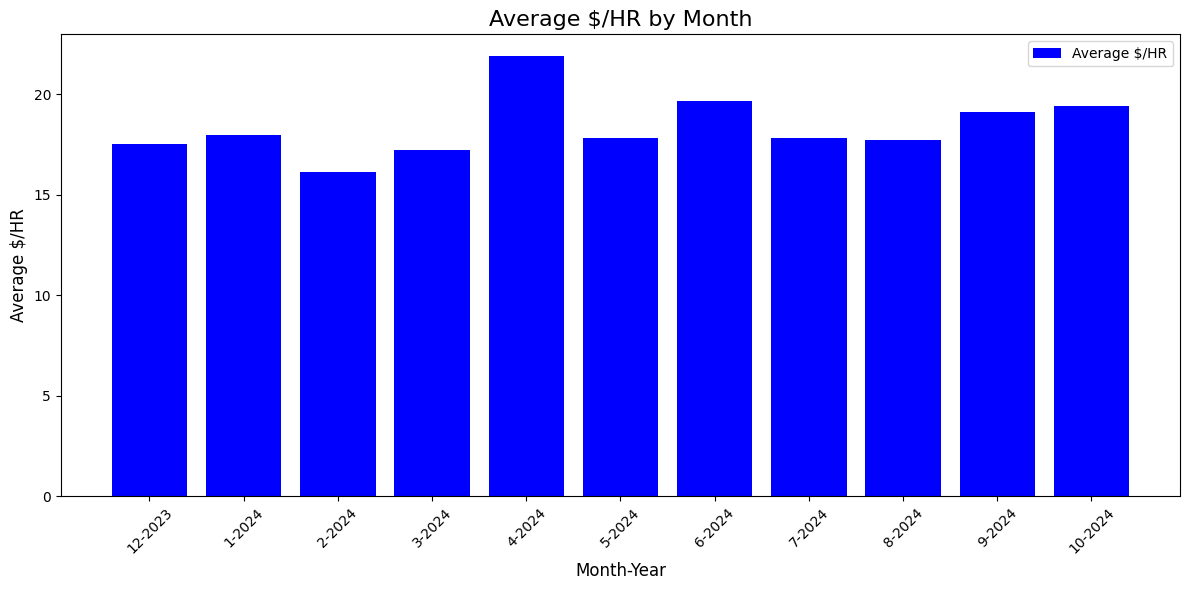

In [26]:
# creates a bar chart of my average dollar per hour amount by month

monthly_avg_hr = doordash.groupby(['Year', 'Month'])['$/HR'].mean().reset_index()

monthly_avg_hr['Month-Year'] = monthly_avg_hr['Month'].astype(str) + '-' + monthly_avg_hr['Year'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_hr['Month-Year'], monthly_avg_hr['$/HR'], color='blue', label='Average $/HR')
plt.title('Average $/HR by Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average $/HR', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
monthly_avg_hr

,Year,Month,$/HR,Month-Year
0,2023,12,17.515714,12-2023
1,2024,1,17.953750,1-2024
2,2024,2,16.120000,2-2024
3,2024,3,17.208000,3-2024
4,2024,4,21.877500,4-2024
5,2024,5,17.806818,5-2024
6,2024,6,19.649545,6-2024
7,2024,7,17.808889,7-2024
8,2024,8,17.723684,8-2024
9,2024,9,19.099091,9-2024


In [28]:
print(monthly_avg_hr)

    Year  Month       $/HR Month-Year
0   2023     12  17.515714    12-2023
1   2024      1  17.953750     1-2024
2   2024      2  16.120000     2-2024
3   2024      3  17.208000     3-2024
4   2024      4  21.877500     4-2024
5   2024      5  17.806818     5-2024
6   2024      6  19.649545     6-2024
7   2024      7  17.808889     7-2024
8   2024      8  17.723684     8-2024
9   2024      9  19.099091     9-2024
10  2024     10  19.402500    10-2024


In [29]:
monthly_avg_hr

,Year,Month,$/HR,Month-Year
0,2023,12,17.515714,12-2023
1,2024,1,17.953750,1-2024
2,2024,2,16.120000,2-2024
3,2024,3,17.208000,3-2024
4,2024,4,21.877500,4-2024
5,2024,5,17.806818,5-2024
6,2024,6,19.649545,6-2024
7,2024,7,17.808889,7-2024
8,2024,8,17.723684,8-2024
9,2024,9,19.099091,9-2024


In [30]:
doordash["Location"].unique()

array(['Fairlawn', 'N Canton', 'Hudson', 'Green', 'Kent', 'Medina',
       'C Falls', 'Alliance', 'X', 'Barberton'], dtype=object)

In [31]:
# creates a data frame for the month of june data

june_data = doordash[doordash['Date'].dt.month == 6]
june_data

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status,Month,Year
59,2024-06-01,Hudson,Saturday,3.17,0.0,1.0,8.0,68.50,1.0,21.61,Platinum,6,2024
60,2024-06-02,Fairlawn,Sunday,3.00,1.0,1.0,8.0,69.50,0.0,23.17,Platinum,6,2024
61,2024-06-03,Hudson,Monday,3.17,0.0,1.0,7.0,52.25,1.0,16.48,Platinum,6,2024
62,2024-06-04,Kent,Tuesday,2.75,0.0,0.0,9.0,52.84,1.0,19.21,Platinum,6,2024
63,2024-06-06,Kent,Thursday,3.00,1.0,0.0,11.0,53.25,1.0,17.75,Platinum,6,2024
64,2024-06-07,C Falls,Friday,3.00,0.0,0.0,10.0,55.94,1.0,18.65,Platinum,6,2024
65,2024-06-09,Fairlawn,Sunday,2.50,0.0,0.0,7.0,33.03,1.0,13.21,Platinum,6,2024
66,2024-06-10,Hudson,Monday,3.00,1.0,1.0,6.0,43.98,1.0,14.66,Platinum,6,2024
67,2024-06-11,Kent,Tuesday,3.00,0.0,0.0,12.0,61.72,1.0,20.57,Platinum,6,2024
68,2024-06-12,N Canton,Wednesday,3.00,1.0,1.0,6.0,40.22,1.0,13.41,Silver,6,2024


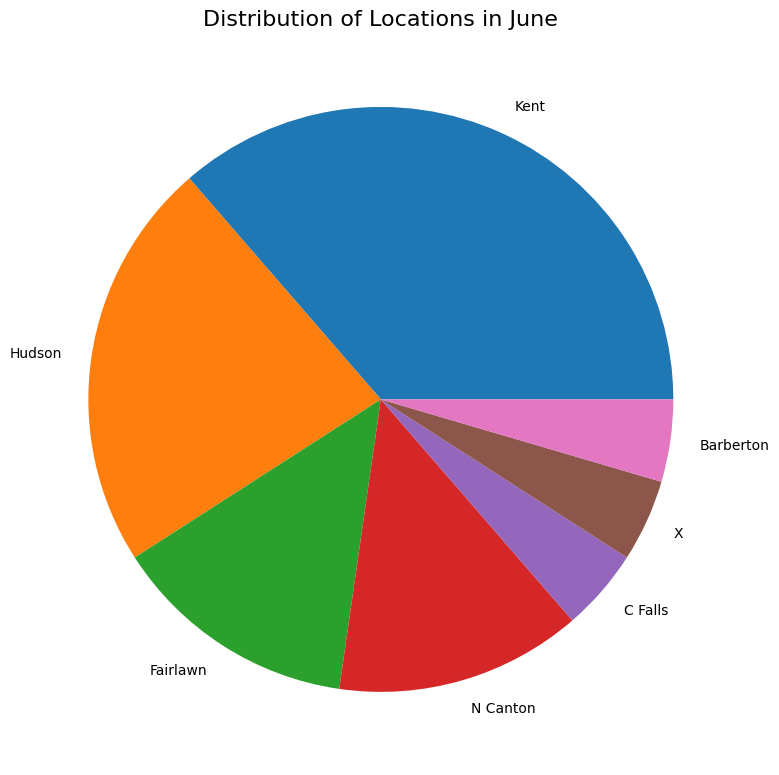

In [32]:
location_counts_june = june_data['Location'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(location_counts_june, labels=location_counts_june.index)
plt.title('Distribution of Locations in June', fontsize=16)
plt.tight_layout()
plt.show()

# creates a pie chart of the location distribution for the month of june
# june was my highest dollar per hour amount

In [33]:
# prints the average dollar per hour amount for each individual month

monthly_avg_hr = doordash.groupby(['Year', 'Month'])['$/HR'].mean().reset_index()

for index, row in monthly_avg_hr.iterrows():
    print(f"Year: {row['Year']}, Month: {row['Month']} - Average $/HR: ${row['$/HR']:.2f}")


Year: 2023.0, Month: 12.0 - Average $/HR: $17.52
Year: 2024.0, Month: 1.0 - Average $/HR: $17.95
Year: 2024.0, Month: 2.0 - Average $/HR: $16.12
Year: 2024.0, Month: 3.0 - Average $/HR: $17.21
Year: 2024.0, Month: 4.0 - Average $/HR: $21.88
Year: 2024.0, Month: 5.0 - Average $/HR: $17.81
Year: 2024.0, Month: 6.0 - Average $/HR: $19.65
Year: 2024.0, Month: 7.0 - Average $/HR: $17.81
Year: 2024.0, Month: 8.0 - Average $/HR: $17.72
Year: 2024.0, Month: 9.0 - Average $/HR: $19.10
Year: 2024.0, Month: 10.0 - Average $/HR: $19.40


In [34]:
# prints the number of entries I have for each individual month
monthly_counts = doordash.groupby(['Year', 'Month']).size().reset_index(name='Row Count')

for index, row in monthly_counts.iterrows():
    print(f"Year: {row['Year']}, Month: {row['Month']} - Row Count: {row['Row Count']}")



Year: 2023, Month: 12 - Row Count: 14
Year: 2024, Month: 1 - Row Count: 8
Year: 2024, Month: 2 - Row Count: 1
Year: 2024, Month: 3 - Row Count: 10
Year: 2024, Month: 4 - Row Count: 4
Year: 2024, Month: 5 - Row Count: 22
Year: 2024, Month: 6 - Row Count: 22
Year: 2024, Month: 7 - Row Count: 18
Year: 2024, Month: 8 - Row Count: 19
Year: 2024, Month: 9 - Row Count: 11
Year: 2024, Month: 10 - Row Count: 4


In [35]:
# creates a data frame for each of my months where I had at least 10 entries

december_data = doordash[doordash['Date'].dt.month == 12]

march_data = doordash[doordash['Date'].dt.month == 3]

may_data = doordash[doordash['Date'].dt.month == 5]

july_data = doordash[doordash['Date'].dt.month == 7]

august_data = doordash[doordash['Date'].dt.month == 8]

september_data = doordash[doordash['Date'].dt.month == 9]

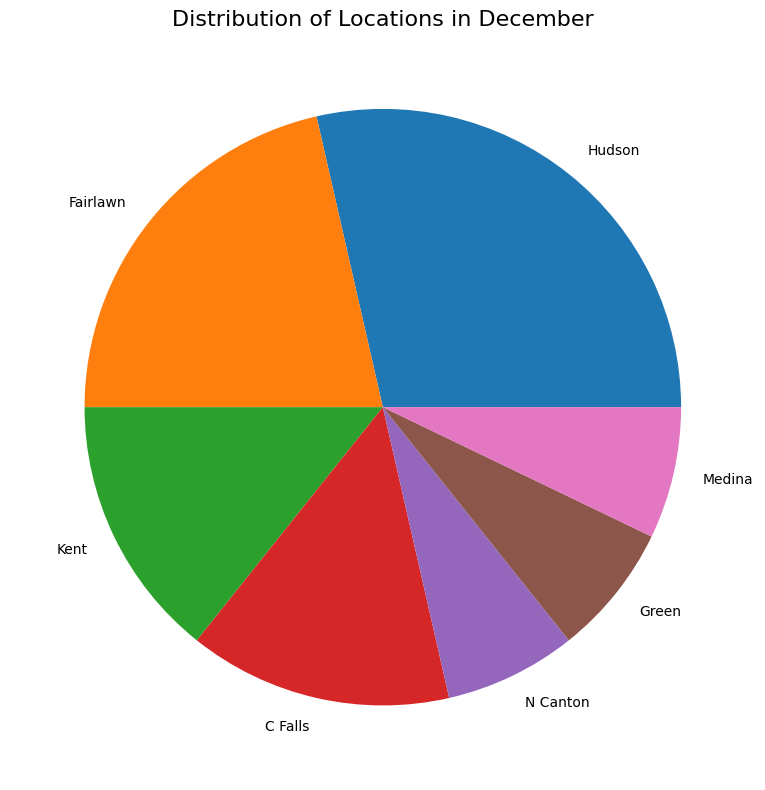

In [36]:
location_counts_december = december_data['Location'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(location_counts_december, labels=location_counts_december.index)
plt.title('Distribution of Locations in December', fontsize=16)
plt.tight_layout()
plt.show()


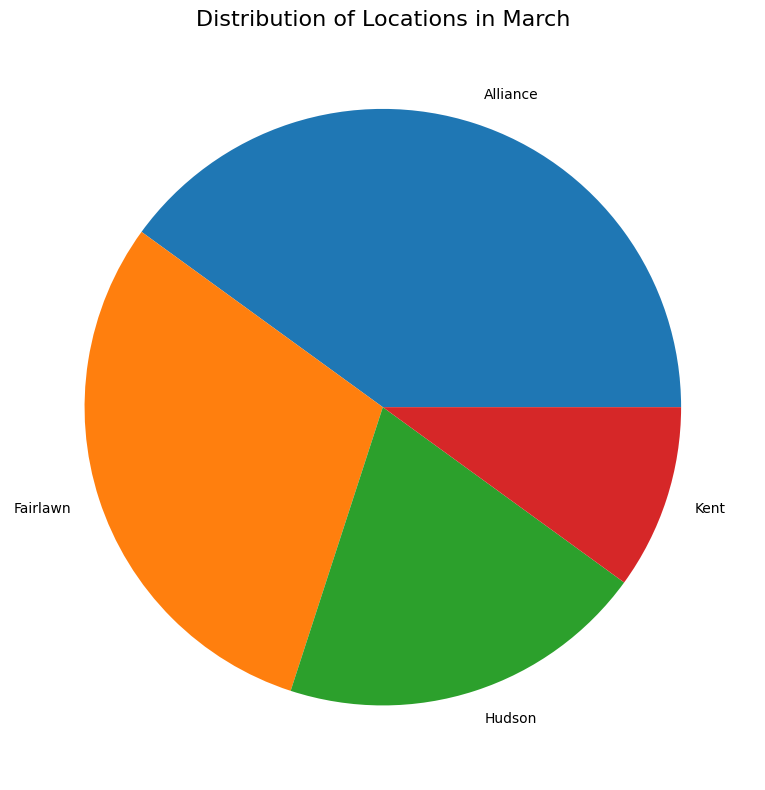

In [37]:
location_counts_march = march_data['Location'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(location_counts_march, labels=location_counts_march.index)
plt.title('Distribution of Locations in March', fontsize=16)
plt.tight_layout()
plt.show()


In [38]:
# prints the average $/HR amount for each day of the week and listed from highest
# amount to lowest amount
doordash['Weekday'] = doordash['Date'].dt.dayofweek

weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
doordash['Weekday Name'] = doordash['Weekday'].map(weekday_map)

weekday_avg_hr = doordash.groupby('Weekday Name')['$/HR'].mean().reset_index()

weekday_avg_hr_sorted = weekday_avg_hr.sort_values(by='$/HR', ascending=False)

for index, row in weekday_avg_hr_sorted.iterrows():
    print(f"Day: {row['Weekday Name']} - Average $/HR: ${row['$/HR']:.2f}")


Day: Saturday - Average $/HR: $19.92
Day: Sunday - Average $/HR: $19.44
Day: Tuesday - Average $/HR: $18.04
Day: Wednesday - Average $/HR: $17.81
Day: Monday - Average $/HR: $17.50
Day: Thursday - Average $/HR: $17.41
Day: Friday - Average $/HR: $17.30


In [39]:
# prints the average $/HR amount for each individual location ranked from
# highest to lowest amount but only for locations with at least 10 entries


location_counts = doordash['Location'].value_counts()

locations_to_include = location_counts[location_counts >= 10].index

filtered_df = doordash[doordash['Location'].isin(locations_to_include)]

location_avg_hr = filtered_df.groupby('Location')['$/HR'].mean().reset_index()

location_avg_hr_sorted = location_avg_hr.sort_values(by='$/HR', ascending=False)


for index, row in location_avg_hr_sorted.iterrows():
    print(f"Location: {row['Location']} - Average $/HR: ${row['$/HR']:.2f}")




Location: Alliance - Average $/HR: $19.39
Location: Hudson - Average $/HR: $18.50
Location: Kent - Average $/HR: $18.30
Location: Fairlawn - Average $/HR: $18.28
Location: N Canton - Average $/HR: $17.03
Location: C Falls - Average $/HR: $16.93


In [40]:
location_counts = doordash['Location'].value_counts().reset_index(name='Row Count')

location_counts.columns = ['Location', 'Row Count']

for index, row in location_counts.iterrows():
    print(f"Location: {row['Location']} - Row Count: {row['Row Count']}")


Location: Kent - Row Count: 34
Location: Fairlawn - Row Count: 25
Location: Alliance - Row Count: 25
Location: Hudson - Row Count: 22
Location: C Falls - Row Count: 12
Location: N Canton - Row Count: 11
Location: Green - Row Count: 1
Location: Medina - Row Count: 1
Location: X - Row Count: 1
Location: Barberton - Row Count: 1


In [41]:
max_pay_per_day = doordash.groupby(['Location', 'Weekday'])['$/HR'].max().reset_index()

max_pay_pivot = max_pay_per_day.pivot(index='Location', columns='Weekday', values='$/HR')

max_pay_pivot.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(max_pay_pivot)


           Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Location                                                                 
Alliance    21.24    23.75      24.07     19.00   24.21     23.55   23.33
Barberton     NaN      NaN      28.16       NaN     NaN       NaN     NaN
C Falls     16.50    12.70      18.32       NaN   20.27       NaN     NaN
Fairlawn    11.47    16.75      18.13     14.08   20.90       NaN   23.17
Green         NaN      NaN        NaN       NaN     NaN       NaN   14.43
Hudson      19.64    17.05      15.13       NaN   12.38     33.25     NaN
Kent        23.00    23.62      19.40     24.75     NaN       NaN     NaN
Medina        NaN    15.50        NaN       NaN     NaN       NaN     NaN
N Canton    23.36    15.08      18.46       NaN   20.36       NaN     NaN
X             NaN      NaN        NaN     14.25     NaN       NaN     NaN


In [42]:
# creates a pivot table that displays the dollar per hour amount average
#for each day, and location
# but only for results that have minimum 3 entries

entry_counts = doordash.groupby(['Location', 'Weekday']).size().reset_index(name='Count')

filtered_entries = entry_counts[entry_counts['Count'] >= 3]

filtered_df = pd.merge(doordash, filtered_entries[['Location', 'Weekday']], on=['Location', 'Weekday'])

mean_pay_per_day = filtered_df.groupby(['Location', 'Weekday'])['$/HR'].mean().reset_index()

mean_pay_pivot = mean_pay_per_day.pivot(index='Location', columns='Weekday', values='$/HR')

mean_pay_pivot.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(mean_pay_pivot)



             Monday  Tuesday  Wednesday   Thursday    Friday   Saturday  \
Location                                                                  
Alliance        NaN      NaN  19.920000  16.266667  17.53000  19.296667   
C Falls         NaN      NaN        NaN        NaN  17.64125        NaN   
Fairlawn        NaN      NaN  17.586667        NaN       NaN        NaN   
Hudson    17.257500      NaN        NaN        NaN       NaN  20.345385   
Kent      18.707500   18.935  17.300000  18.000000       NaN        NaN   
N Canton  17.306667      NaN  16.678000        NaN       NaN        NaN   

             Sunday  
Location             
Alliance  21.227500  
C Falls         NaN  
Fairlawn  19.314118  
Hudson          NaN  
Kent            NaN  
N Canton        NaN  


In [43]:
mean_pay_pivot

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Location,,,,,,,
Alliance,NaN,NaN,19.920000,16.266667,17.53000,19.296667,21.227500
C Falls,NaN,NaN,NaN,NaN,17.64125,NaN,NaN
Fairlawn,NaN,NaN,17.586667,NaN,NaN,NaN,19.314118
Hudson,17.257500,NaN,NaN,NaN,NaN,20.345385,NaN
Kent,18.707500,18.935,17.300000,18.000000,NaN,NaN,NaN
N Canton,17.306667,NaN,16.678000,NaN,NaN,NaN,NaN


In [44]:
best_locations = mean_pay_per_day.loc[mean_pay_per_day.groupby('Weekday')['$/HR'].idxmax()]

best_locations['Weekday'] = best_locations['Weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

print(best_locations[['Weekday', 'Location', '$/HR']])


      Weekday  Location       $/HR
10     Monday      Kent  18.707500
11    Tuesday      Kent  18.935000
0   Wednesday  Alliance  19.920000
13   Thursday      Kent  18.000000
5      Friday   C Falls  17.641250
9    Saturday    Hudson  20.345385
4      Sunday  Alliance  21.227500


In [45]:
# creates a table that shows maximizes the average dollar per hour amount based on
# the location, weekday, and good or bad weather

entry_counts = doordash.groupby(['Location', 'Weekday']).size().reset_index(name='Count')

filtered_entries_2 = entry_counts[entry_counts['Count'] >= 3]

filtered_data = pd.merge(doordash, filtered_entries_2[['Location', 'Weekday']], on=['Location', 'Weekday'])


avg_pay_with_weather = filtered_data.groupby(['Location', 'Weekday', 'B Weather'])['$/HR'].mean().reset_index()

best_locations_with_weather = avg_pay_with_weather.loc[avg_pay_with_weather.groupby(['Weekday', 'B Weather'])['$/HR'].idxmax()]

best_locations_with_weather['Weekday'] = best_locations_with_weather['Weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

best_locations_with_weather['Weather'] = best_locations_with_weather['B Weather'].map({1: 'Good Weather', 0: 'Bad Weather'})

print(best_locations_with_weather[['Weekday', 'Weather', 'Location', '$/HR']])

      Weekday       Weather  Location       $/HR
16     Monday  Good Weather      Kent  18.707500
17    Tuesday  Good Weather      Kent  18.935000
9   Wednesday   Bad Weather  Fairlawn  17.900000
0   Wednesday  Good Weather  Alliance  19.920000
19   Thursday   Bad Weather      Kent  14.960000
20   Thursday  Good Weather      Kent  18.405333
7      Friday   Bad Weather   C Falls  18.980000
3      Friday  Good Weather  Alliance  18.855000
14   Saturday   Bad Weather    Hudson  16.316667
15   Saturday  Good Weather    Hudson  21.554000
11     Sunday   Bad Weather  Fairlawn  22.910000
6      Sunday  Good Weather  Alliance  21.813333


In [46]:
# creates a table that shows maximizes the average dollar per hour amount based on
# the location, weekday, and day or night

entry_counts = doordash.groupby(['Location', 'Weekday']).size().reset_index(name='Count')

filtered_entries_2 = entry_counts[entry_counts['Count'] >= 3]

filtered_data = pd.merge(doordash, filtered_entries_2[['Location', 'Weekday']], on=['Location', 'Weekday'])


avg_pay_with_night = filtered_data.groupby(['Location', 'Weekday', 'Night'])['$/HR'].mean().reset_index()

best_locations_with_night = avg_pay_with_night.loc[avg_pay_with_night.groupby(['Weekday', 'Night'])['$/HR'].idxmax()]

best_locations_with_night['Weekday'] = best_locations_with_night['Weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

best_locations_with_night['Night'] = best_locations_with_night['Night'].map({1: 'Day', 0: 'Night'})

print(best_locations_with_night[['Weekday', 'Night', 'Location', '$/HR']])

      Weekday  Night  Location       $/HR
18     Monday  Night      Kent  23.000000
15     Monday    Day    Hudson  17.516667
20    Tuesday  Night      Kent  20.800000
21    Tuesday    Day      Kent  17.070000
0   Wednesday  Night  Alliance  21.716667
11  Wednesday    Day  Fairlawn  17.430000
24   Thursday  Night      Kent  19.186000
25   Thursday    Day      Kent  17.505833
8      Friday  Night   C Falls  18.650000
9      Friday    Day   C Falls  17.497143
16   Saturday  Night    Hudson  24.957500
17   Saturday    Day    Hudson  18.295556
6      Sunday  Night  Alliance  19.645000
7      Sunday    Day  Alliance  22.810000


In [47]:
# creates a table that shows maximizes the average dollar per hour amount based on
# the location, weekday, and holiday or regular day

entry_counts = doordash.groupby(['Location', 'Weekday']).size().reset_index(name='Count')

filtered_entries_2 = entry_counts[entry_counts['Count'] >= 3]

filtered_data = pd.merge(doordash, filtered_entries_2[['Location', 'Weekday']], on=['Location', 'Weekday'])


avg_pay_with_holiday = filtered_data.groupby(['Location', 'Weekday', 'Holiday'])['$/HR'].mean().reset_index()

best_locations_with_holiday = avg_pay_with_holiday.loc[avg_pay_with_holiday.groupby(['Weekday', 'Holiday'])['$/HR'].idxmax()]

best_locations_with_holiday['Weekday'] = best_locations_with_holiday['Weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

best_locations_with_holiday['Holiday'] = best_locations_with_holiday['Holiday'].map({1: 'Regular Day', 0: 'Holiday'})

print(best_locations_with_holiday[['Weekday', 'Holiday', 'Location', '$/HR']])

      Weekday      Holiday  Location       $/HR
19     Monday      Holiday      Kent  23.000000
27     Monday  Regular Day  N Canton  17.306667
21    Tuesday      Holiday      Kent  21.495000
22    Tuesday  Regular Day      Kent  17.228333
0   Wednesday      Holiday  Alliance  21.716667
12  Wednesday  Regular Day  Fairlawn  17.430000
25   Thursday      Holiday      Kent  18.415000
26   Thursday  Regular Day      Kent  17.872308
9      Friday      Holiday   C Falls  18.650000
4      Friday  Regular Day  Alliance  17.530000
17   Saturday      Holiday    Hudson  26.780000
18   Saturday  Regular Day    Hudson  19.175455
7      Sunday      Holiday  Alliance  19.645000
8      Sunday  Regular Day  Alliance  22.810000


In [48]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          133 non-null    datetime64[ns]
 1   Location      133 non-null    object        
 2   Weekday       133 non-null    int32         
 3   Hours         133 non-null    float64       
 4   Night         133 non-null    float64       
 5   Holiday       133 non-null    float64       
 6   Deliveries    133 non-null    float64       
 7   Amount        133 non-null    float64       
 8   B Weather     133 non-null    float64       
 9   $/HR          133 non-null    float64       
 10  Status        133 non-null    object        
 11  Month         133 non-null    int32         
 12  Year          133 non-null    int32         
 13  Weekday Name  133 non-null    object        
dtypes: datetime64[ns](1), float64(7), int32(3), object(3)
memory usage: 13.1+ KB


In [49]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(doordash['Location'], doordash['B Weather'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the p-value
if p < 0.05:
    print("There is a significant relationship between Location and Weather.")
else:
    print("There is no significant relationship between Location and Weather.")


Chi-Squared: 18.081266755289686
P-value: 0.034242322111546625
Degrees of Freedom: 9
Expected Frequencies Table:
[[ 2.81954887 22.18045113]
 [ 0.11278195  0.88721805]
 [ 1.35338346 10.64661654]
 [ 2.81954887 22.18045113]
 [ 0.11278195  0.88721805]
 [ 2.48120301 19.51879699]
 [ 3.83458647 30.16541353]
 [ 0.11278195  0.88721805]
 [ 1.2406015   9.7593985 ]
 [ 0.11278195  0.88721805]]
There is a significant relationship between Location and Weather.


In [50]:
contingency_table = pd.crosstab(doordash['Night'], doordash['B Weather'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the p-value
if p < 0.05:
    print("There is a significant relationship between Time of Day and Weather.")
else:
    print("There is no significant relationship between Time of Day and Weather.")

Chi-Squared: 1.465530358723027
P-value: 0.22605222861116828
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 5.63909774 44.36090226]
 [ 9.36090226 73.63909774]]
There is no significant relationship between Time of Day and Weather.


In [51]:
contingency_table = pd.crosstab(doordash['Weekday'], doordash['B Weather'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the p-value
if p < 0.05:
    print("There is a significant relationship between Weekday and Weather.")
else:
    print("There is no significant relationship between Weekday and Weather.")

Chi-Squared: 5.440286262424847
P-value: 0.4887030999302815
Degrees of Freedom: 6
Expected Frequencies Table:
[[ 1.57894737 12.42105263]
 [ 1.91729323 15.08270677]
 [ 2.2556391  17.7443609 ]
 [ 2.48120301 19.51879699]
 [ 1.80451128 14.19548872]
 [ 2.48120301 19.51879699]
 [ 2.48120301 19.51879699]]
There is no significant relationship between Weekday and Weather.


In [52]:
contingency_table = pd.crosstab(doordash['Weekday'], doordash['Holiday'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the p-value
if p < 0.05:
    print("There is a significant relationship between Weekday and Holiday.")
else:
    print("There is no significant relationship between Weekday and Holiday.")

Chi-Squared: 8.992317290552586
P-value: 0.17401060233326676
Degrees of Freedom: 6
Expected Frequencies Table:
[[ 4.52631579  9.47368421]
 [ 5.4962406  11.5037594 ]
 [ 6.46616541 13.53383459]
 [ 7.11278195 14.88721805]
 [ 5.17293233 10.82706767]
 [ 7.11278195 14.88721805]
 [ 7.11278195 14.88721805]]
There is no significant relationship between Weekday and Holiday.


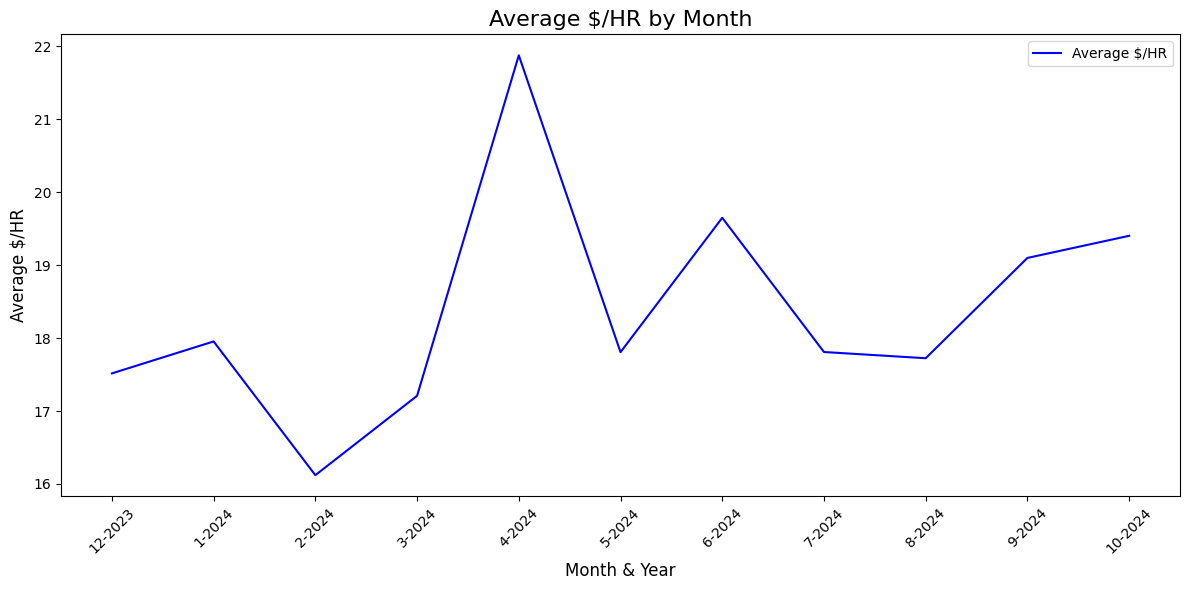

In [53]:
monthly_avg_hr = doordash.groupby(['Year', 'Month'])['$/HR'].mean().reset_index()

monthly_avg_hr['Month-Year'] = monthly_avg_hr['Month'].astype(str) + '-' + monthly_avg_hr['Year'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_hr['Month-Year'], monthly_avg_hr['$/HR'], color='blue', label='Average $/HR')
plt.title('Average $/HR by Month', fontsize=16)
plt.xlabel('Month & Year', fontsize=12)
plt.ylabel('Average $/HR', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [55]:
doordash

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status,Month,Year,Weekday Name
0,2023-12-14,Fairlawn,3,1.42,1.0,1.0,5.0,20.00,1.0,14.08,Na,12,2023,Thursday
1,2023-12-15,N Canton,4,2.00,1.0,1.0,6.0,33.25,1.0,16.63,Na,12,2023,Friday
2,2023-12-16,Hudson,5,2.00,1.0,1.0,6.0,35.00,1.0,17.50,Na,12,2023,Saturday
3,2023-12-17,Green,6,1.75,1.0,0.0,4.0,25.25,0.0,14.43,Na,12,2023,Sunday
4,2023-12-18,Kent,0,2.00,1.0,1.0,8.0,34.00,1.0,17.00,Na,12,2023,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-29,Alliance,6,3.75,0.0,0.0,9.0,73.00,0.0,19.47,Gold,9,2024,Sunday
129,2024-10-03,Alliance,3,2.00,0.0,1.0,6.0,38.00,1.0,19.00,Gold,10,2024,Thursday
130,2024-10-17,Kent,3,3.00,1.0,1.0,10.0,53.00,1.0,17.67,Gold,10,2024,Thursday
131,2024-10-18,N Canton,4,1.83,1.0,1.0,4.0,37.25,1.0,20.36,Gold,10,2024,Friday


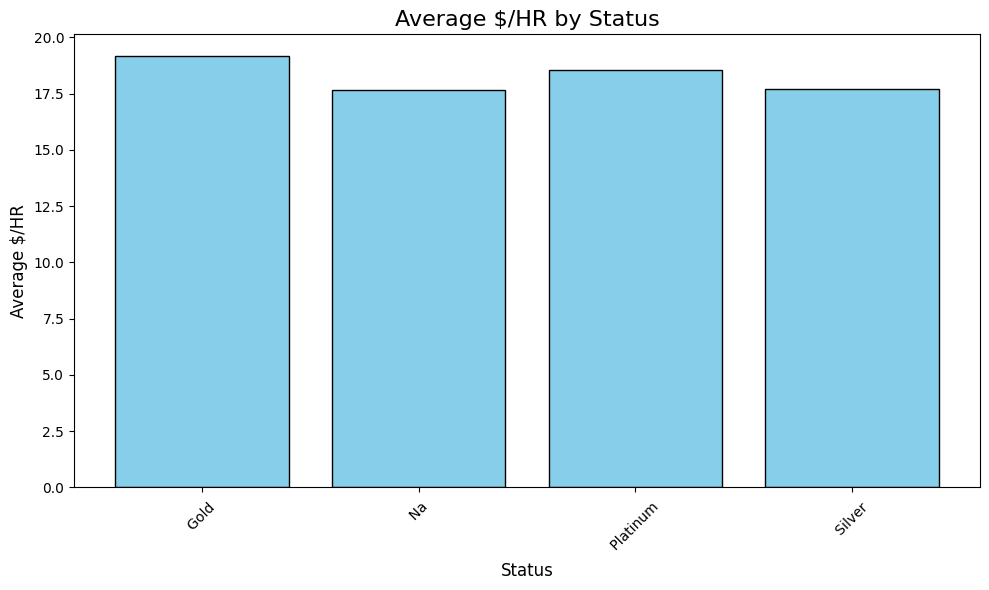

In [56]:
# creates a chart showing the average amount on average by each status

status_avg_hr = doordash.groupby('Status')['$/HR'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(status_avg_hr['Status'], status_avg_hr['$/HR'], color='skyblue', edgecolor='black')

plt.xlabel('Status', fontsize=12)
plt.ylabel('Average $/HR', fontsize=12)
plt.title('Average $/HR by Status', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [57]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          133 non-null    datetime64[ns]
 1   Location      133 non-null    object        
 2   Weekday       133 non-null    int32         
 3   Hours         133 non-null    float64       
 4   Night         133 non-null    float64       
 5   Holiday       133 non-null    float64       
 6   Deliveries    133 non-null    float64       
 7   Amount        133 non-null    float64       
 8   B Weather     133 non-null    float64       
 9   $/HR          133 non-null    float64       
 10  Status        133 non-null    object        
 11  Month         133 non-null    int32         
 12  Year          133 non-null    int32         
 13  Weekday Name  133 non-null    object        
dtypes: datetime64[ns](1), float64(7), int32(3), object(3)
memory usage: 13.1+ KB


In [58]:
doordash

,Date,Location,Weekday,Hours,Night,Holiday,Deliveries,Amount,B Weather,$/HR,Status,Month,Year,Weekday Name
0,2023-12-14,Fairlawn,3,1.42,1.0,1.0,5.0,20.00,1.0,14.08,Na,12,2023,Thursday
1,2023-12-15,N Canton,4,2.00,1.0,1.0,6.0,33.25,1.0,16.63,Na,12,2023,Friday
2,2023-12-16,Hudson,5,2.00,1.0,1.0,6.0,35.00,1.0,17.50,Na,12,2023,Saturday
3,2023-12-17,Green,6,1.75,1.0,0.0,4.0,25.25,0.0,14.43,Na,12,2023,Sunday
4,2023-12-18,Kent,0,2.00,1.0,1.0,8.0,34.00,1.0,17.00,Na,12,2023,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-29,Alliance,6,3.75,0.0,0.0,9.0,73.00,0.0,19.47,Gold,9,2024,Sunday
129,2024-10-03,Alliance,3,2.00,0.0,1.0,6.0,38.00,1.0,19.00,Gold,10,2024,Thursday
130,2024-10-17,Kent,3,3.00,1.0,1.0,10.0,53.00,1.0,17.67,Gold,10,2024,Thursday
131,2024-10-18,N Canton,4,1.83,1.0,1.0,4.0,37.25,1.0,20.36,Gold,10,2024,Friday
